# Principal Component Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

In [14]:
PATH_DIR = './'
os.chdir(PATH_DIR)

In [15]:
os.getcwd()

'D:\\TFG\\TFG git'

In [17]:
PATH = 'Data/Original dataset 11-2022/'
PATH_FILE_XLSX = 'users.xlsx'

dataset = pd.read_excel(PATH+PATH_FILE_XLSX)

In [3]:
selected_columns = ['location', 'protected',  'verified',  'followers_count',  'friends_count', 'listed_count',  'favourites_count',  'statuses_count',  'created_at', 'geo_enabled',  'default_profile',  'default_profile_image']

In [4]:
dataset[selected_columns]

location  protected  verified  followers_count  friends_count  \
0              1          0         0               83           1766   
1              1          0         0           194699            678   
2              1          0         0             2457           1740   
3              1          0         0               89             54   
4              1          0         0            48900           3592   
...          ...        ...       ...              ...            ...   
131083         1          0         0             2741              9   
131084         1          0         0              661            580   
131085         1          0         0               40              0   
131086         1          0         0              364           4995   
131087         1          0         0            51437            123   

        listed_count  favourites_count  statuses_count  created_at  \
0                  1             25329            3119        2020   
1                441              1055            5909        2019   
2                 11               731          594737        2016   
3                  0              1537            1737        2022   
4                 22             18798            4386        2020   
...              ...               ...             ...         ...   
131083             6              1239            2061        2019   
131084             0             38884           11299        2022   
131085             1              6241            4186        2021   
131086             2             35095           18113        2018   
131087           218             10498            2105        2022   

        geo_enabled  default_profile  default_profile_image  
0                 0                1                      0  
1                 1                1                      0  
2                 0                0                      0  
3                 0                1                      0  
4                 0                1                      0  
...             ...              ...                    ...  
131083            0                1                      0  
131084            0                1                      0  
131085            0                1                      0  
131086            0                1                      0  
131087            1                1                      0  

[131088 rows x 12 columns]

In [5]:
data = dataset[selected_columns]

In [6]:
# scale the data before performing PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

### 6 components

In [10]:
pca = PCA(n_components=6)
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, evr in enumerate(explained_variance_ratio):
    print(f"Variance explained by PC{i+1}: {evr:.2f}")

# Total variance explained
total_variance_explained = np.sum(explained_variance_ratio)
print(f"Total variance explained: {total_variance_explained:.2f}")

Variance explained by PC1: 0.25
Variance explained by PC2: 0.18
Variance explained by PC3: 0.12
Variance explained by PC4: 0.09
Variance explained by PC5: 0.09
Variance explained by PC6: 0.08
Total variance explained: 0.80


### 3 components

In [11]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each principal component
for i, evr in enumerate(explained_variance_ratio):
    print(f"Variance explained by PC{i+1}: {evr:.2f}")

# Total variance explained
total_variance_explained = np.sum(explained_variance_ratio)
print(f"Total variance explained: {total_variance_explained:.2f}")



Variance explained by PC1: 0.25
Variance explained by PC2: 0.18
Variance explained by PC3: 0.12
Total variance explained: 0.54


## Plotting the data

In [12]:
features = ['location', 'protected',  'verified',  'followers_count',  'friends_count', 'listed_count',  'favourites_count',  'statuses_count',  'created_at', 'geo_enabled',  'default_profile',  'default_profile_image']

fig = px.scatter_matrix(
    data,
    dimensions=features,
)
fig.update_traces(diagonal_visible=False)
fig.show()

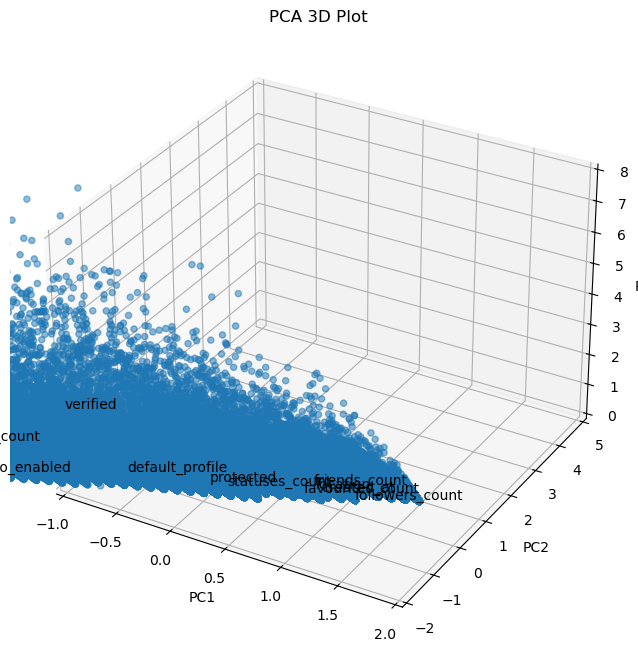

In [45]:
X = data.iloc[:, :]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
components = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(components['PC1'], components['PC2'], components['PC3'])

# Annotate the main attributes affecting each component
for i, feature in enumerate(X.columns):
    ax.text(components.iloc[i, 0], components.iloc[i, 1], components.iloc[i, 2], feature)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Plot')

# Set limits for each axis to zoom in
ax.set_xlim(-1, 2)
ax.set_ylim(-2, 5)
ax.set_zlim(0, 8)

plt.show()


### Results

In [40]:
# Applying PCA
pca = PCA(n_components=3)
pca = pca.fit(data)

In [31]:
features = ['location', 'protected',  'verified',  'followers_count',  'friends_count', 'listed_count',  'favourites_count',  'statuses_count',  'created_at', 'geo_enabled',  'default_profile',  'default_profile_image']

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=features)
loadings

PC1           PC2           PC3
location               5.313587e-09  1.467293e-07 -5.952920e-07
protected             -0.000000e+00 -1.110223e-16 -1.110223e-16
verified               3.946670e-08  3.000574e-08  5.879996e-08
followers_count        9.999922e-01 -3.192501e-03 -1.511976e-03
friends_count          8.453385e-04  4.239099e-03 -1.111189e-02
listed_count           1.544425e-03  3.381150e-04  2.707960e-04
favourites_count      -1.069482e-03  1.370760e-01 -9.904922e-01
statuses_count         3.366800e-03  9.905463e-01  1.371111e-01
created_at            -3.165097e-07 -3.738327e-06  1.040501e-05
geo_enabled            1.439318e-08  2.101619e-07 -6.423289e-07
default_profile       -2.844280e-08 -2.706425e-07  6.173020e-07
default_profile_image  0.000000e+00 -0.000000e+00 -0.000000e+00

The loadings represent the weights or coefficients of these original features in each principal component.

Each principal component is a linear combination of the original features, and the loadings indicate how much each original feature contributes to that component. Higher absolute values of loadings for a particular feature in a component imply that the feature has a stronger influence on that component.